# Simulador de Jogos de Dados

## Importando bibliotecas

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import triang
import scipy.stats as stats                                                                                                                     

## Simulador de dados - function

Para realizar as simulações foram criadas duas funções:

- joga_dados -> realiza o random (joga os dados) e a soma dos dois dados    #função auxiliar
- simulador_dados -> simula vários lançamentos e armazena em um array

In [2]:
# Função auxiliar para o lançamento dos dois dados e realizar a soma deles
def joga_dados():
    dado_1 = np.random.randint(1, 7)
    dado_2 = np.random.randint(1, 7)
    soma_dados = dado_1 + dado_2
    return soma_dados

In [3]:
# Função para gerar o array com as somas dos pares de dados lançados
def simulador_dados(range_lancamentos: int) -> np.ndarray:
    '''Essa função simula o lançamento de dois dados de forma aleatória.

    Input:
        simulacoes_range -> quantidade de lançamentos dos dados

    Output:
        array_dados -> todas as somas dos pares de dados lançados
    '''
    array_dados = np.array([joga_dados() for num in range(range_lancamentos)])
    return array_dados


## Criando simulações de jogos de dados


Informações:
* lista_array_100 -> lista que possui 9 arrays, cada um com 100 jogos de dados - soma do lançamento de dois dados.
* lista_array_1_000 -> lista que possui 9 arrays, cada um com 1.000 jogos de dados - soma do lançamento de dois dados.
* lista_array_10_000 -> lista que possui 9 arrays, cada um com 10.000 jogos de dados - soma do lançamento de dois dados.
* array_10_000_000 -> array com 10.000.000 jogos de dados - soma do lançamento de dois dados.

In [4]:
# Gerando listas com os arrays das somas dos dados para plotar gráficos

lista_array_100 = [simulador_dados(100) for quant in range(9)]
lista_array_1_000 = [simulador_dados(1_000) for quant in range(9)]
lista_array_10_000 = [simulador_dados(10_000) for quant in range(9)]
array_10_000_000 = simulador_dados(10_000_000)

## Funções para plotar gráficos


Para a criação de gráficos foram criadas duas funções tais que:

gera_grafico(): gera apenas um gráfico mostrando a distribuição e probabilidade dos dados tais comparados a uma distribuição normal e evidenciando sua distribuição teórica.

gera_nove_gráficos: gera em uma subplot nove gráficos para comparação das distribuições e probabilidades

In [22]:
def gera_grafico(array: np.ndarray, color: str) -> None:
    # Organizando o histograma de barras
    fig, ax = plt.subplots()
    
    numeros_bins = np.arange(2, 14) - 0.5 # Definindo os bins - somas dos dados
    
    # Histograma de barras
    y_pont_dens, bins, patches = ax.hist(array, bins=numeros_bins, rwidth=0.8, density = True, alpha=0.7, color= color)
    x_pontos = np.arange(2, 13)

    # Calcular a distribuição normal ajustada para a altura das barras do histograma
    media, desvio_padrao = np.mean(array), np.std(array)
    x_dist_normal = np.linspace(np.min(array), np.max(array), 100)
    y_dist_normal = stats.norm.pdf(x_dist_normal, media, desvio_padrao)

    # Curva da distribuição teórica e normal ajustada
    ax.plot(x_pontos, y_pont_dens, '-', color='blue', label='Distribuição teórica')
    ax.plot(x_dist_normal, y_dist_normal, '--', color='purple', label='Distribuição normal ajustada')

    # Configuração de rótulos, título e legenda
    ax.set_xticks(x_pontos)
    ax.set_xticklabels(x_pontos)
    ax.set_xlabel('Soma dos dados')
    ax.set_ylabel('Densidade de probabilidade')
    ax.set_title('Distribuição de probabilidade da soma de dois dados')
    ax.legend()

    # Adicionar rótulos às barras
    for idx in range(len(y_pont_dens)):
        ax.text(bins[idx] + 0.5, y_pont_dens[idx], f'{y_pont_dens[idx]:.3f}', ha='center', va='bottom')

    # Ajustar espaçamento para evitar corte do rótulo do eixo y
    fig.tight_layout()

    # Mostrar o gráfico
    plt.show()

In [28]:
def gera_nove_graficos(lista_arrays: list, color: str) -> None:
     # Organizando o histograma de barras e subplots
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
    
    numeros_bins = np.arange(2, 14) - 0.5 # Definindo os bins - somas dos dados
    
    # Criando loop para gerar cada um dos gráficos em determinada coluna e linha
    for idx, array in enumerate(lista_arrays):
        linha = idx // 3
        coluna = idx % 3
        ax = axes[linha, coluna]
        
        # Histograma de barras
        y_pont_dens, bins, patches = ax.hist(array, bins=numeros_bins, density=True, rwidth=0.8, alpha=0.7, color= color)
        x_pontos = np.arange(2, 13)
        
        # Calcular a distribuição normal ajustada para a altura das barras do histograma
        media, desvio_padrao = np.mean(array), np.std(array)
        x_dist_normal = np.linspace(np.min(array), np.max(array), 100)
        y_dist_normal = stats.norm.pdf(x_dist_normal, media, desvio_padrao)

        # Plotar a curva da distribuição normal ajustada
        ax.plot(x_dist_normal, y_dist_normal, '--', color='purple', label='Distribuição normal ajustada')

        # Configurar rótulos, título, legenda e rótulos das barras
        ax.set_xticks(x_pontos)
        ax.set_xticklabels(x_pontos)
        ax.set_xlabel('Soma dos dados')
        ax.set_ylabel('Densidade de probabilidade')
        ax.set_title('Distribuição de probabilidade da soma de dois dados')
        ax.legend()

        # Adicionar rótulos às barras
        for j in range(len(y_pont_dens)):
            ax.text(bins[j] + 0.5, y_pont_dens[j], f'{y_pont_dens[j]:.3f}', ha='center', va='bottom')

    # Ajustar espaçamento para evitar corte do rótulo do eixo y
    fig.tight_layout()

    # Mostrar o gráfico
    plt.show()

## Análise de um array

### Estatísticas descritivas

Para estas estatísticas descritivas, criarem um novo array.

In [7]:
# Criando array
array = simulador_dados(100_000)

In [8]:
# Gerando estatísticas descritivas

media = np.mean(array)
maximo = np.max(array)
minimo = np.min(array)
unique_values, count = np.unique(array, return_counts=True)
dicionario_lancamentos = dict(zip(unique_values,count))

In [9]:
print(f'''  Informações sobre o array \n {'-'*30}
Média: {media}
Máximo: {maximo}
Mínimo: {minimo}
Quantidade dos lançamentos:''')
for key in dicionario_lancamentos.keys():
    print(f'{key}: {dicionario_lancamentos[key]}')

  Informações sobre o array 
 ------------------------------
Média: 6.99798
Máximo: 12
Mínimo: 2
Quantidade dos lançamentos:
2: 2797
3: 5517
4: 8363
5: 11073
6: 13899
7: 16770
8: 13915
9: 11124
10: 8198
11: 5492
12: 2852


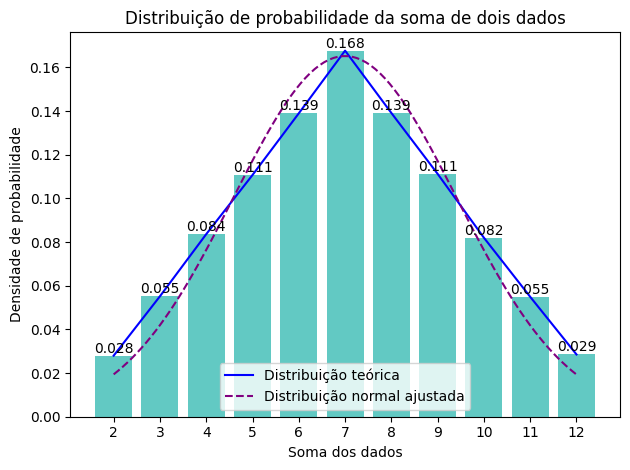

In [15]:
# Gerando gráfico desse array 
gera_grafico(array, 'lightseagreen')

Dado que a quantidade foi de 100.000 jogos de dados, de acordo o eixo y da densidade de probabilidade, a soma dos dados tem maior probabilidade de ter o valor 7. Visto que este pode ser o resultado da soma dos dados em diversas combinações como: (1,6), (2,5), (3,4), (4,3), (5,2), (6,1), o que comparado ao valor 2 ou 12 é muito diferente, já que estes possuem apenas uma única combinação (1, 1) e (6, 6) respectivamente. Para melhor entendimento desses dados, irei ampliar essas análises, realizando comparações entre arrays de diferentes tamanhos.

## Comparações dos arrays


#### Arrays com **100** jogos de dados

Foi criado uma lista com 9 arrays todos eles com **100** lançamentos duplos de dados.

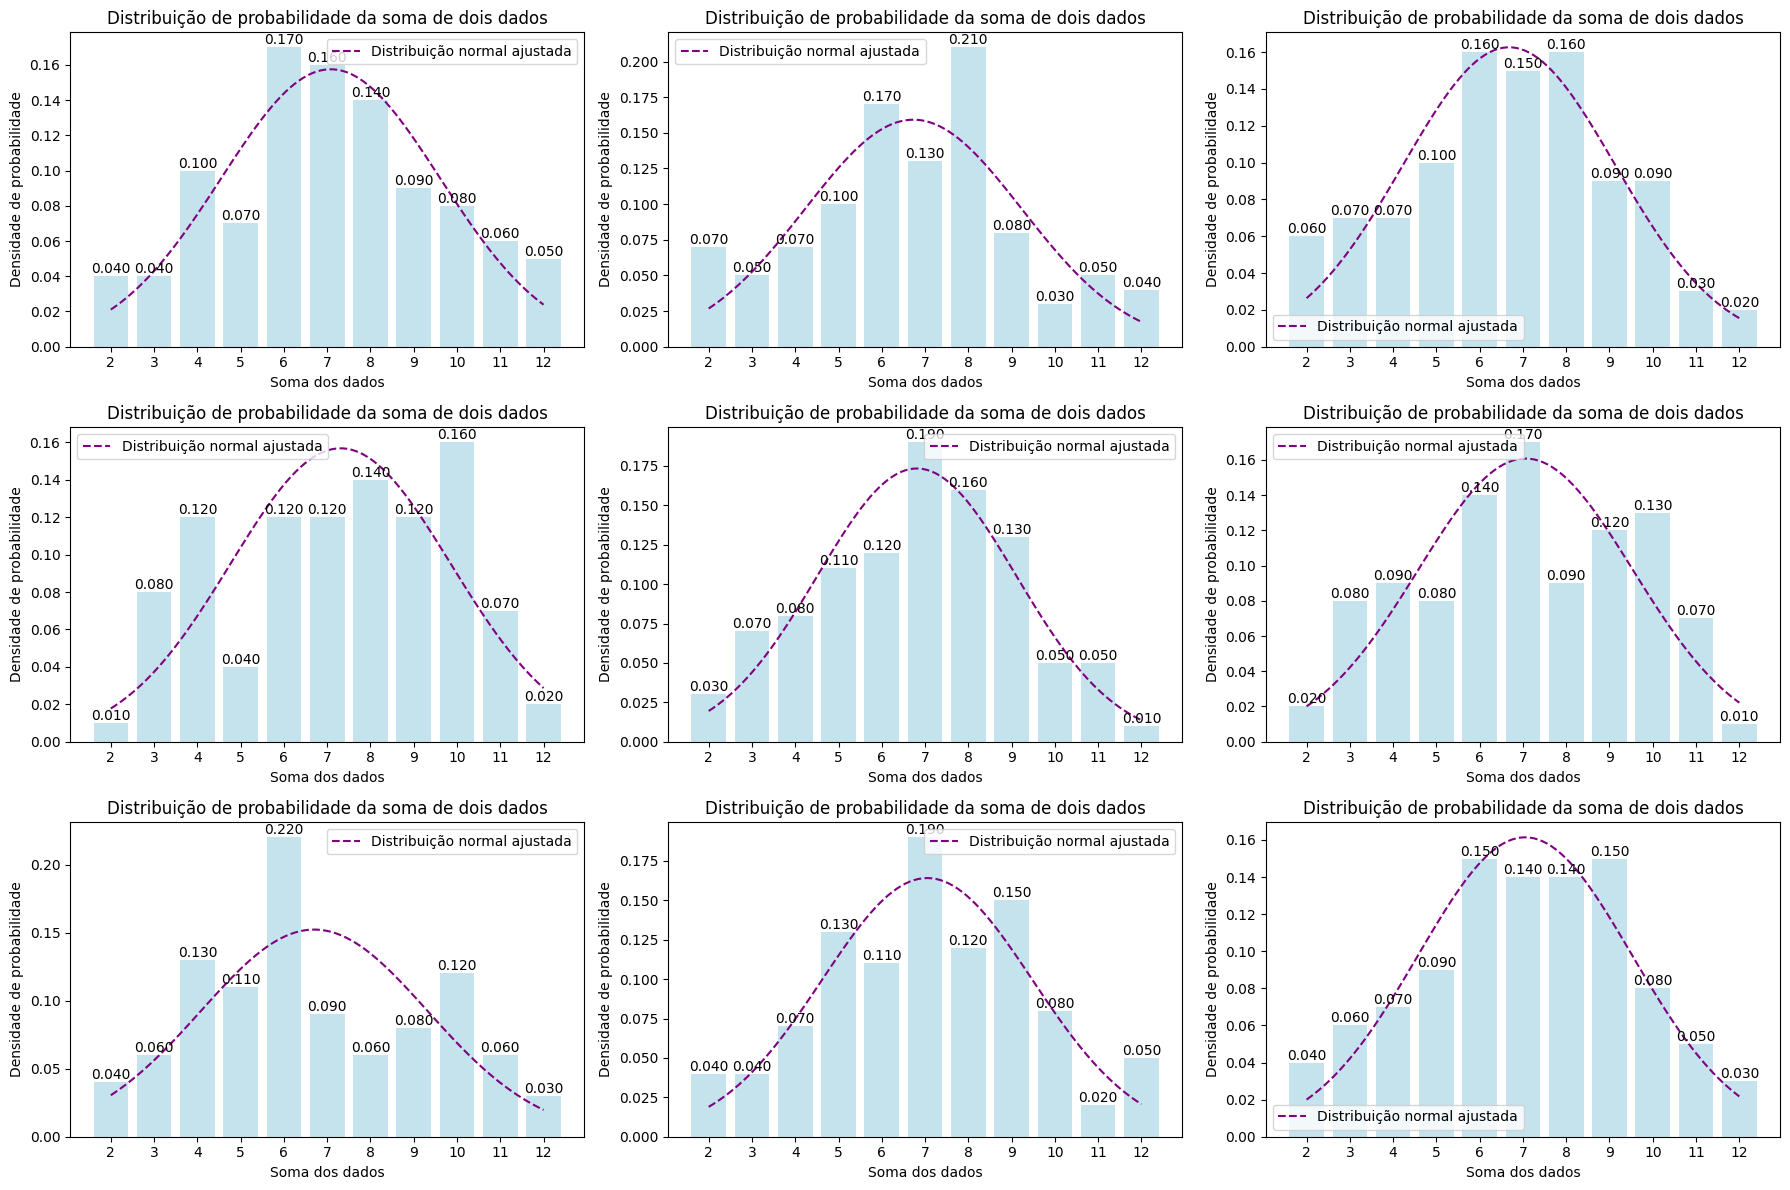

In [29]:
gera_nove_graficos(lista_array_100, 'lightblue')

#### Arrays com **1.000** jogos de dados

Foi criado uma lista com 9 arrays todos eles com **1.000** lançamentos duplos de dados.

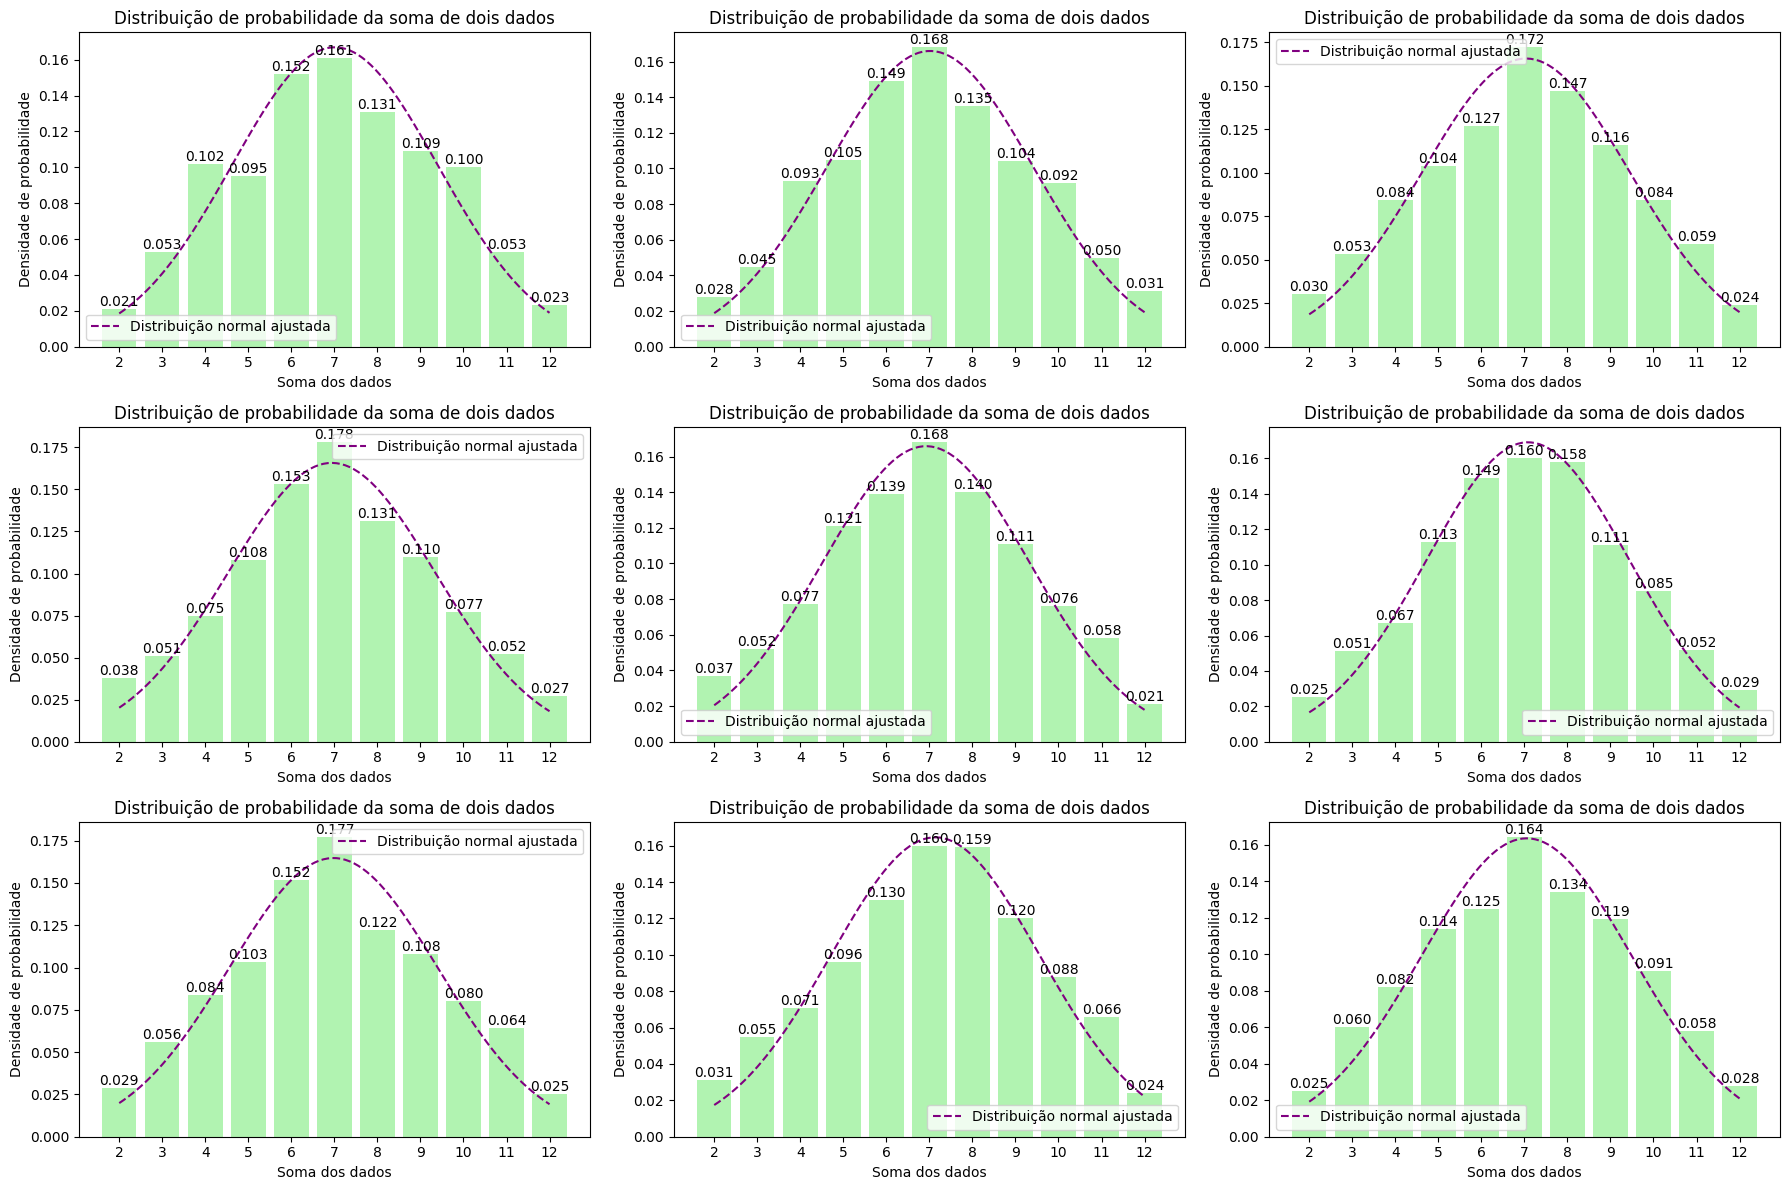

In [30]:
gera_nove_graficos(lista_array_1_000[0:9], 'lightgreen')

#### Arrays com **10.000** jogos de dados

Foi criado uma lista com 9 arrays todos eles com **10.000** lançamentos duplos de dados.

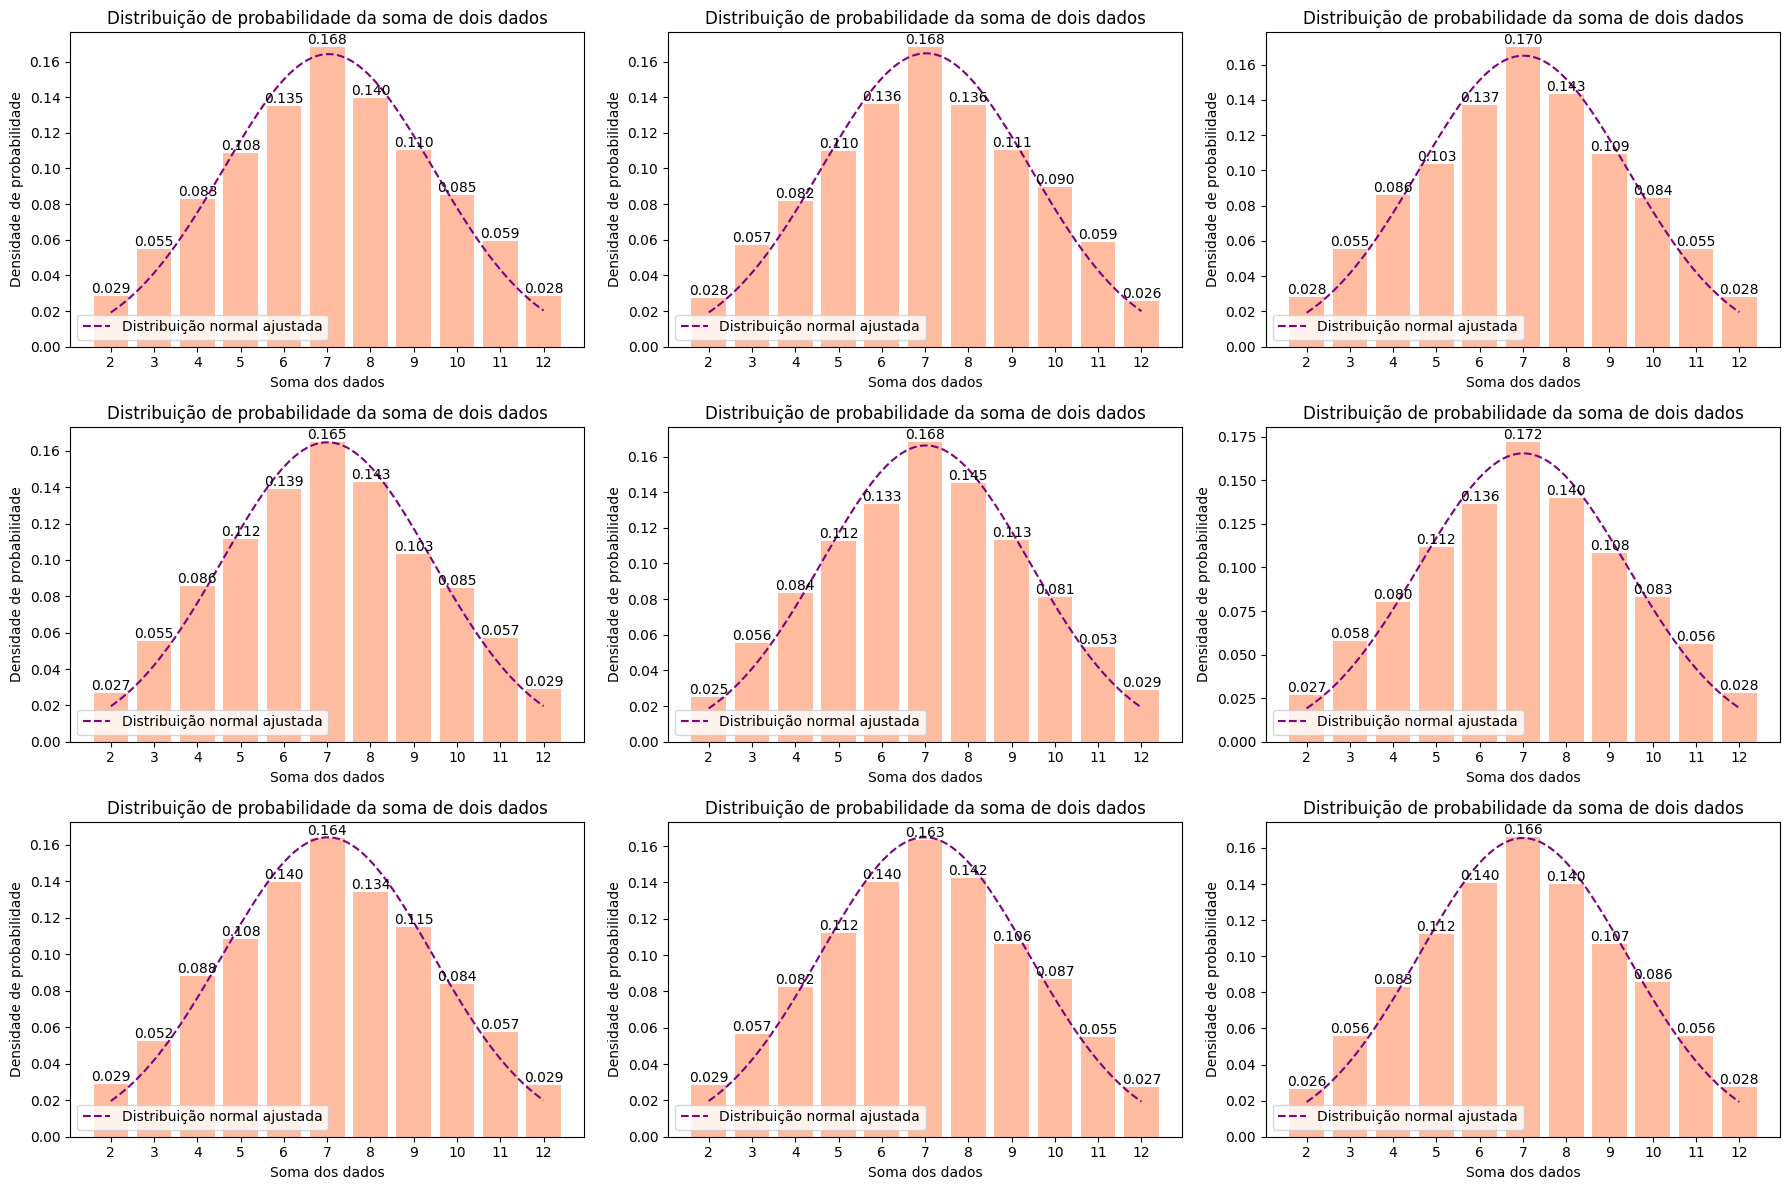

In [32]:
gera_nove_graficos(lista_array_10_000, 'lightsalmon')

Visto no gráfico com barras azuis a distribuição não é igual para todas as somas, é notável que para os valores dos extremos a probabilidade é menor do que para aqueles se encontram no meio. Mas ainda sim a distribuição não segue um padrão, em alguns gráficos um valor que teria alta probabilidade, em outro gráfico a probabilidade é bem baixa. Com isso seguindo o Teorema Central do Limite, aumentando o tamanho da amostra a distribuição amostral da média aproxima-se cada vez mais de uma distribuição normal, que é o que vemos nos dois gráficos seguintes (azul e salmão). É nítido que a probabilidade da soma ser 2 ou ser 7 é discrepante.

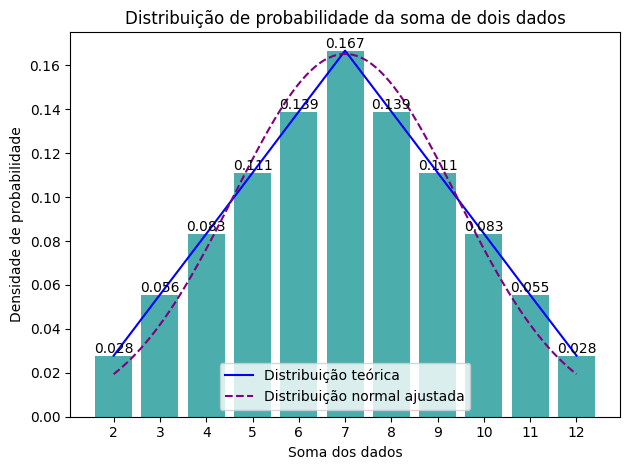

In [38]:
gera_grafico(array_10_000_000, 'darkcyan')

E finalmente a distribuição com os 10.000.000 jogos. É notável que tende a uma distribuição normal, mas não é necessariamente uma, esta ditribuição está mais próxima de uma distribuição triangular.

## Jogo justo?

Para um jogo justo todos os lançamentos deveriam ser igualmente prováveis, mesmo que os lançamentos dos dados são igualmente prováveis, cada número no dado tem 1/6 de chance de sair, quando já mudamos para dois dados a probabilidade de sair dois valores 1 é diferente da probabilidade de sair o val}or 1 e 2. E mais ainda, tratando-se de soma, a probabilidade da soma desses dados ser igual a 2 é muito diferente da probabilidade dessa soma ser igual a 5, por exemplo.
Isso será demonstrado na tabela

| dado |  1  |  2  |  3  |  4  |  5  |  6  |
|---|---|---|---|---|---|---|
| **1** | 2 | 3 | 4 | 5 | 6 | 7 |
| **2** | 3 | 4 | 5 | 6 | 7 | 8 |
| **3** | 4 | 5 | 6 | 7 | 8 | 9 |
| **4** | 5 | 6 | 7 | 8 | 9 | 10 |
| **5** | 6 | 7 | 8 | 9 | 10 | 11 |
| **6** | 7 | 8 | 9 | 10 | 11 | 12 |

Somando a quantidade de vezes que o número aparece dividido pelo total temos a probabilidade de cada uma dessas somas aparecerem:

|Soma dos Dados| 2 | 3  | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|---|---|---|---|---|---|---|---|---|---|---|---|
|Probabilidade| 1/36 | 2/36 | 3/36 | 4/36 | 5/36 | **6/36** | 5/36 | 4/36 | 3/36 | 2/36 | 1/36 |

Com isso sabemos que não é um jogo justo, sendo a chance não é igual para diferentes valores (soma dos dados) informados.

Então para um jogador de dados que deve acertar qual será a soma obtida de dois dados aleatórios, a sua chance sempre será maior quando o valor informado é de 7, a probabilidade de acerto é de 1/6. E ao contrário disso, a probabilidade de acerto quando informado valores 2 ou 12 é 6 vezes menor.

Dessa forma, apenas consideraria, este, um jogo mais justo se houvesse peso de acordo com a probabilidade de acerto dos números. Por exemplo, quando se acerta o valor 2 ou 12 , tenha um peso maior do que quando o jogador acerta o valor de soma igual 7, seja em pontuação, ou qualquer que seja a forma de premiação para este jogo.